<a href="https://colab.research.google.com/github/marghistani22/Supervised-Machine-Learning/blob/main/Muska%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd

df = pd.read_csv('/content/data (4) (2).csv', index_col=0)

# Check if 'Class' is the actual name of the column
print(df.columns)  # Print the column names to verify

# Clean column names to remove any extra spaces
df.columns = df.columns.str.strip()

# Ensure 'Class' exists before proceeding
if 'diagnosis' in df.columns:
    y = df['diagnosis'].values
    X = df.drop(columns='diagnosis').values
    print(df[['diagnosis']].value_counts())
else:
    print("Column 'Class' not found. Check for similar names or typos.")


Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
diagnosis
B            357
M            212
Name: count, dtype: int64


In [31]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='diagnosis') # Features
y = df['diagnosis']

# Perform train-test split (40% for testing and 60% for training)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.40,
                                    random_state=1)

# Display the shapes of the test and train sets
X_test.shape, X_train.shape



((228, 31), (341, 31))

In [34]:
#--------------------------------------------------
## ----------- K-NN Classifier ------------------##
#--------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer # Import SimpleImputer


steps = [('imputer', SimpleImputer(strategy='mean')),
          ('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier(n_neighbors = 5))]

knn_pipeline = Pipeline(steps)
knn_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier())])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


[[143   5]
 [  5  75]]
              precision    recall  f1-score   support

           B       0.97      0.97      0.97       148
           M       0.94      0.94      0.94        80

    accuracy                           0.96       228
   macro avg       0.95      0.95      0.95       228
weighted avg       0.96      0.96      0.96       228

0.9858108108108108


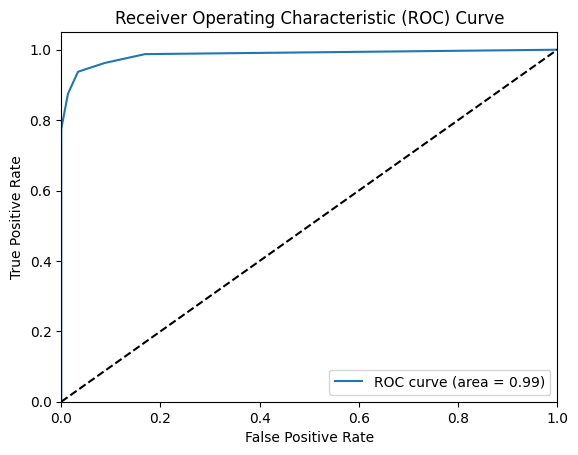

In [38]:
#--------------------------------------------------
## Model Evaluation ##
#--------------------------------------------------
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

ypred_test = knn_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)

ypred_testP = knn_pipeline.predict_proba(X_test)

y_test_numeric = y_test.map({'B': 0, 'M': 1})  # Assuming 'B' is 0 and 'M' is 1

auc = roc_auc_score(y_test, ypred_testP[:,1])
print(auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, ypred_testP[:,1]) # Use the numeric y_test here
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
